### Week 1
### DSC 630
### Abed Tabbalat

In [12]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Diabetes is quite common in our world, whether it get inherited genetically or caused from external factors. The dataset I obtained includes different variables that could have some sort of relationship in the outcome of diabetes. Even though this requires an intensive modeling to determine how these relationships work, we can determine in a high level how these relationships are impacting the results for whether a person is diabetic or not. Can start by using histograms to determine the distribution count for each feature. Boxplots can be used to determine the outliers and what can be done to avoid them. A quick correlation test with a heatmap showing the relationships is a great start for a project for predictive modeling.

In [4]:
# Import data
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# Data content
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

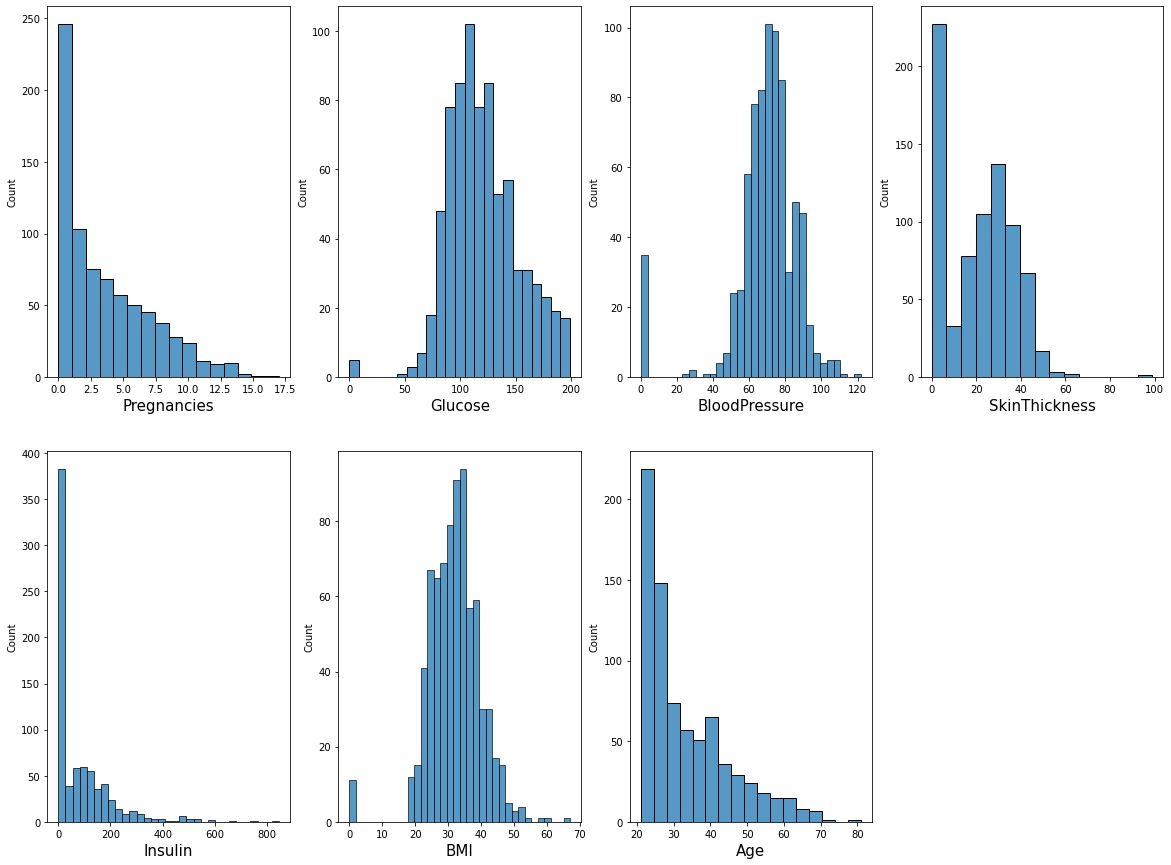

In [27]:
# Create a histogram or bar graph from your data.
## Items interested in are: Pregnancy, Glucose, Blood Pressure, Insulin, Skin Thickness, BMI, and Age
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(20,15))
for i, col in enumerate(cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

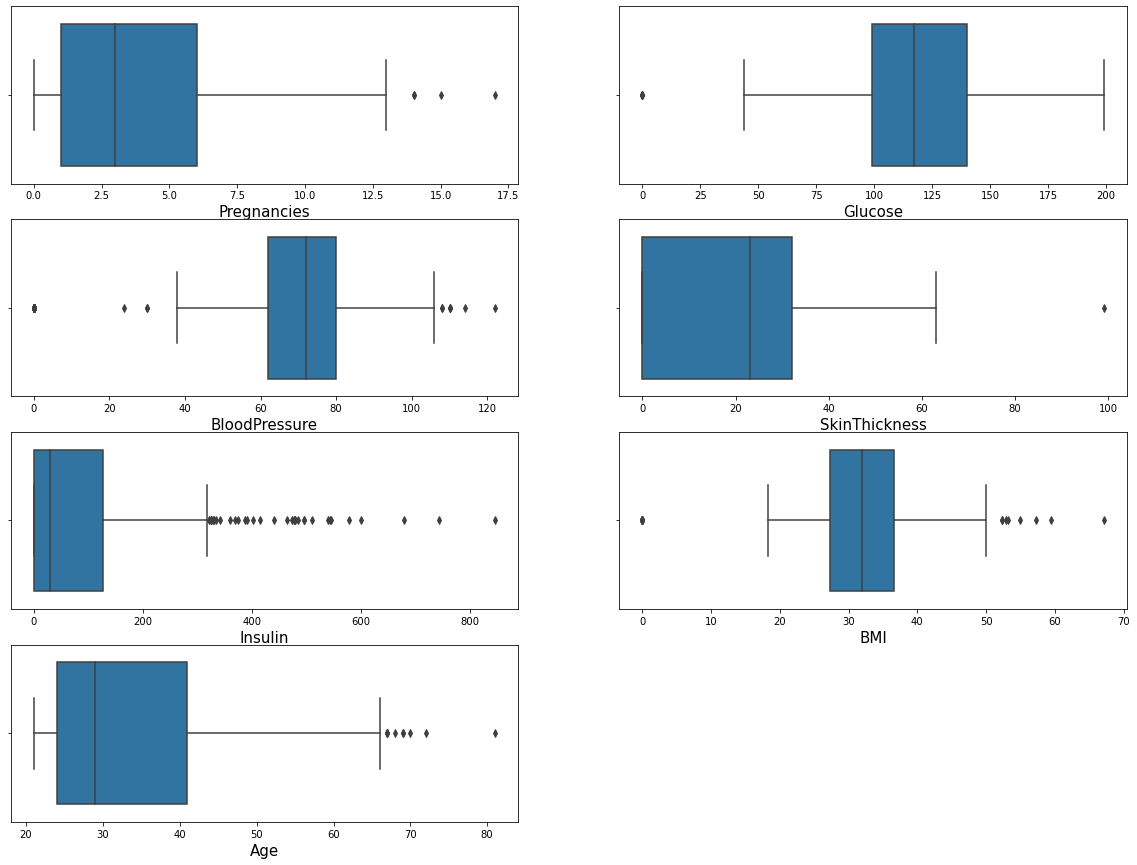

In [29]:
# Create a boxplot from your data.
plt.figure(figsize=(20,15))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

<Figure size 1440x1080 with 0 Axes>

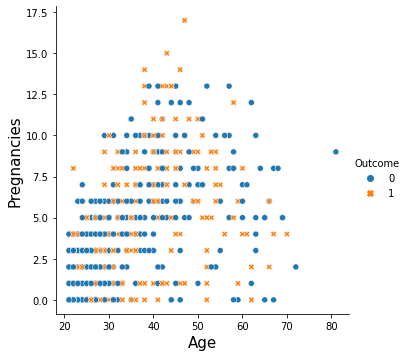

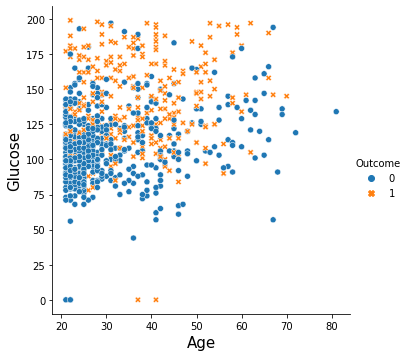

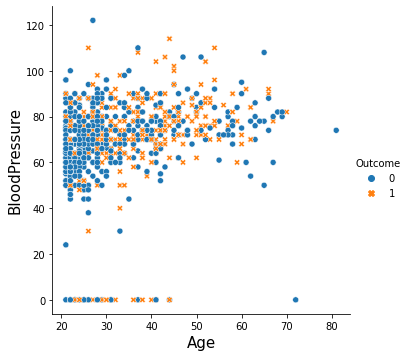

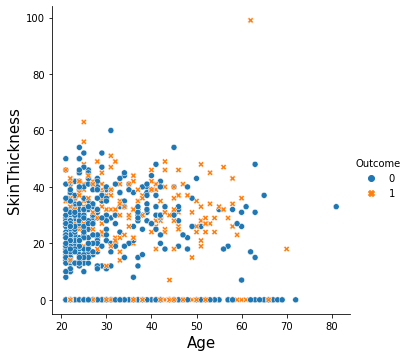

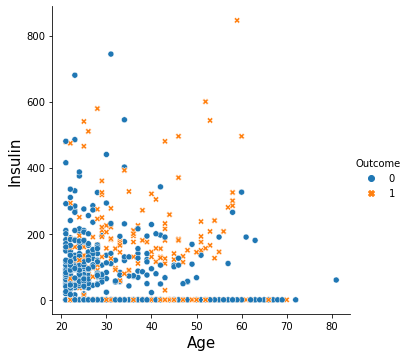

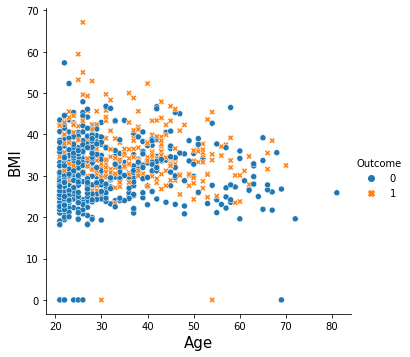

In [41]:
cols1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
plt.figure(figsize=(20,15))
for i, col in enumerate(cols1):
    sns.relplot(data=df, x='Age', y=col, hue='Outcome', style='Outcome')
    plt.xlabel('Age', fontsize=15)
    plt.ylabel(col, fontsize=15)

<AxesSubplot:>

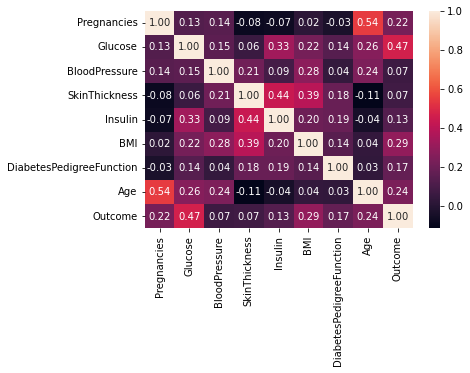

In [43]:
# Create any additional visualizations that will help to answer the question(s) you want to answer.
## Heatmap to show correlation between the variables
sns.heatmap(df.corr(), annot=True, fmt='.2f')

### From looking at the charts we can determine that the higher the glucose level the likelyhood of the outcome being positive with diabetes is true. In addition BMI, SkinThickness, Age are all factors in contributing to the insulin levels. More analysis required to understand how diabetes can happen and based on what. 
* Histograms: All are right skewed except for BloodPressure, meaning we can use median for all and BloodPressure we can use the mean
* BoxPlots: BloodPressure has the most outliers that needs to be addressed if an analysis needed to be done for the dataset
* ScatterPlots: Distribution to Age is what I found important to determine if all other variables are impacted by Age
* HeatMap: Shows the correlation between all variables and for outcome, Glucose levels are the highest positively correlated
